### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [4]:
tf.__version__

'1.14.0'

### Collect Data

In [5]:
import keras

Using TensorFlow backend.


In [6]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


In [7]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY_1=tf.keras.utils.to_categorical(trainY)
testY_1=tf.keras.utils.to_categorical(testY)

In [9]:
print(trainY_1.shape)
print('First 5 examples now are: ', trainY_1[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


In [10]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [11]:
display(trainX.shape,trainY_1.shape)

(60000, 28, 28)

(60000, 10)

### Visualize the data

Plot first 10 images in the triaining set and their labels.

'label for each of the above image:'

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

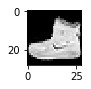

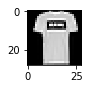

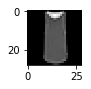

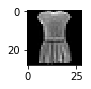

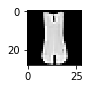

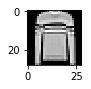

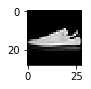

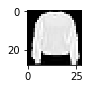

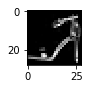

In [12]:
display('label for each of the above image:',trainY[[0,1,2,3,4,5,6,7,8,9]])
import matplotlib.pyplot as plt
for i in range(0,9):
  plt.figure(figsize = (1,1))
  plt.imshow(trainX[i],cmap='gray')
  plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [13]:
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(10, activation='softmax'))

W0929 11:28:55.585305 140176026605440 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

### Execute the model using model.fit()

In [15]:
model.fit(trainX,trainY_1,
          validation_data=(testX,testY_1))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 2s 41us/sample - loss: 2073.4578 - acc: 0.7397 - val_loss: 2229.0520 - val_acc: 0.7278


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential Graph (model)
model_1 = tf.keras.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_1.add(tf.keras.layers.BatchNormalization())

#Add Dense layer for prediction - Keras declares weights and bias automatically
model_1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model - add Loss and Gradient Descent optimizer
model_1.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

### Execute the model

In [28]:
model_1.fit(trainX,trainY_1,
          validation_data=(testX,testY_1))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4932 - acc: 0.8307 - val_loss: 0.4824 - val_acc: 0.8323


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

#Compile the model - add Loss and Gradient Descent optimizer
model_1.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.fit(trainX,trainY_1,
          validation_data=(testX,testY_1))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 2s 38us/sample - loss: 1355.6279 - acc: 0.8072 - val_loss: 1274.0464 - val_acc: 0.8068


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential Graph (model)
model_3 = tf.keras.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_3.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model_3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd hidden layer
model_3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 3rd hidden layer
model_3.add(tf.keras.layers.Dense(10, activation='sigmoid'))

#Add OUTPUT layer
model_3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model - add Loss and Gradient Descent optimizer
model_3.compile(optimizer=SGD(lr=0.03),loss='categorical_crossentropy',
                metrics=['accuracy'])

### Run the model

In [89]:
model_3.fit(trainX,trainY_1,
          validation_data=(testX,testY_1),
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2634 - acc: 0.9067 - val_loss: 0.3582 - val_acc: 0.8743


## Review model

In [0]:
# Looks like irrespective of typo of multi layer, we will still need to find the best slope vlaues with multiple loops (CV)